# Title: Graph Clustering and Similarity Analysis
### Purpose: Can we apply graph clustering and similarity methods to group models by valid cyber security properties?
### Author: @mjz



## Global imports and notebook setup here

In [6]:
%matplotlib inline

#------ python libs ----------
import logging
import os
import sys
import uuid
import pathlib

#------ notebook libs ----------
import matplotlib.pyplot as plt
import networkx as nx
import graphviz
import IPython.display
import numpy as np
# import scipy.stats as st
# import scipy.special
# # bokeh plotting setup
# import bokeh.io
# import bokeh.plotting
# import bokeh.application
# import bokeh.application.handlers
# bokeh.io.output_notebook()
# notebook_url = 'localhost:8888'


#------ project libs ----------
py_mulval_path = r'/opt/projects/diss/py-mulval/src'
sys.path.append(py_mulval_path)

# Just importing for their flags right now
import py_mulval.py_mulval as py_mulval
import py_mulval.boromir as boromir
import py_mulval.log_util as log_util
import py_mulval.mulpy as mulpy
import py_mulval.metrics as secmet
import py_mulval.attack_graph as attack_graph
import py_mulval.mulval_fact_graph as fact_graph 

from py_mulval import flags
FLAGS = flags.FLAGS
FLAGS([sys.argv[0]]) # dont expect cli args from jupyter

['/opt/projects/diss/jupyter_nbs/py36/lib/python3.6/site-packages/ipykernel_launcher.py']

In [13]:
# Show a nx_Agraph in this notebook
def plot_gv(g, title=None):
    A = nx.nx_agraph.to_agraph(g)
    if title:
        A.graph_attr.update(label=title, labelloc='top', labeljust='center', fontsize=24)
    # A.layout('dot', args='-Nfontsize=10 -Nwidth=".2" -Nheight=".2" -Nmargin=0 -Gfontsize=8')
    args = """
    -Gsize=17
    -Nfontname=Roboto
    -Efontname=Roboto
    -Nfontsize=14
    -Efontsize=14
    """
    A.layout('dot', args=args )
    # A.draw(self.outputDir + '/' + outfilename)
    A.draw()
    # plt.show()
    return graphviz.Source(A.to_string())

## Problem & Background Info




## NetLSD - Graph Fingerprint Distance 
https://github.com/xgfs/NetLSD

@inproceedings{Tsitsulin:2018:KDD,
 author={Tsitsulin, Anton and Mottin, Davide and Karras, Panagiotis and Bronstein, Alex and M{\"u}ller, Emmanuel},
 title={NetLSD: Hearing the Shape of a Graph},
 booktitle = {Proceedings of the 24th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining},
 series = {KDD '18},
 year = {2018},
}

In [1]:
import netlsd
import networkx as nx
import numpy as np

g = nx.erdos_renyi_graph(100, 0.01) # create a random graph with 100 nodes
desc1 = netlsd.heat(g) # compute the signature
g = nx.erdos_renyi_graph(100, 0.01) # create a random graph with 100 nodes
desc2 = netlsd.heat(g) # compute the signature


distance1 = netlsd.compare(desc1, desc2) # compare the signatures using l2 distance
print(distance1)
distance2 = np.linalg.norm(desc1 - desc2) # equivalent
print(distance2)

0.754599090929082
0.754599090929082


## Test AG/FG distance

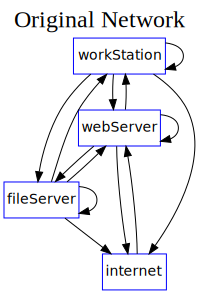

In [19]:
datapath = '/opt/projects/diss/py-mulval/data'

fg = fact_graph.FactGraph()
fg.load_json_file('/opt/projects/diss/py-mulval/data/facts/mulval_facts.multi_host_1.json')
plot_gv(fg, 'Original Network')

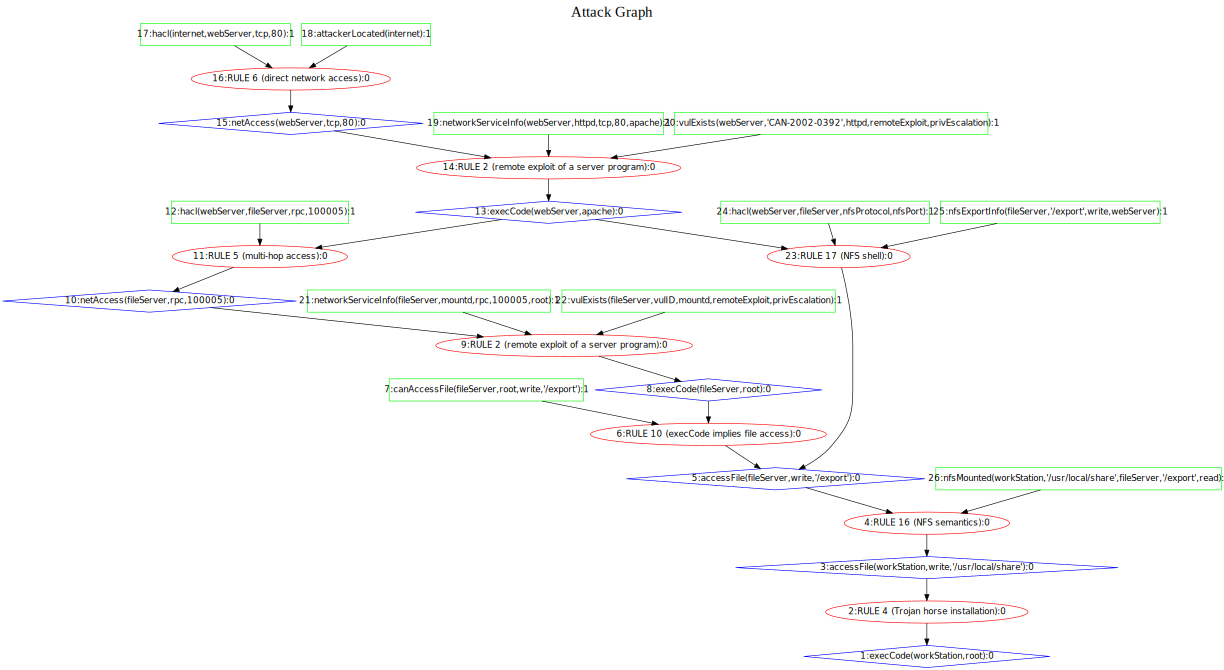

In [20]:


ag = attack_graph.AttackGraph() 
ag.load_dot_file('/opt/projects/diss/py-mulval/data/mulval_ag/small_enterprise/AttackGraph.dot')
ag.load_score_dict('/opt/projects/diss/py-mulval/data/scoreDict.yml')
plot_gv(ag, 'Attack Graph')



In [21]:
desc_ag = netlsd.heat(ag) # compute the signature
desc_fg = netlsd.heat(fg) # compute the signature


distance1 = netlsd.compare(desc1, desc2) # compare the signatures using l2 distance
print(distance1)
distance2 = np.linalg.norm(desc1 - desc2) # equivalent
print(distance2)

NetworkXNotImplemented: not implemented for directed type

## NetLSD doesn't implement DAGs Yet

No problem. 

In [22]:
%%bigquery df

#standardSQL
SELECT thedate, test, value, unit, metric,
-- citation, cite_key, metric, metric_name, metric_summary, metric_usage, 
attack_graph, transition_matrix, transition_matrix_raw,
labels
FROM (
  SELECT
#     value,
    TIMESTAMP_MICROS(CAST(timestamp * 1000000 AS int64)) AS thedate,
    test, value, unit, labels,metric, 
    REGEXP_EXTRACT(labels, r'(?s)\|citation:(.*?)\|') AS citation,
    REGEXP_EXTRACT(labels, r'\|cite_key:(.*?)\|') AS cite_key,
    REGEXP_EXTRACT(labels, r'\|metric_name:(.*?)\|') AS metric_name,
    REGEXP_EXTRACT(labels, r'(?s)\|metric_summary:(.*?)\|') AS metric_summary,
    REGEXP_EXTRACT(labels, r'(?s)\|metric_usage:(.*?)\|') AS metric_usage,
    REGEXP_EXTRACT(labels, r'(?s)\|attack_graph_reduced:(.*?)\|') AS attack_graph,
    REGEXP_EXTRACT(labels, r'(?s)\|transition_matrix:(.*?)\|') AS transition_matrix,
    REGEXP_EXTRACT(labels, r'(?s)\|transition_matrix_raw:(.*?)\|') AS transition_matrix_raw,
    
  FROM
    `cloud-performance-tool.test_notebook_bq.test1`
   WHERE
     test = 'mttf'
     AND metric = 'mttf' 
     and run_uri = 'abeb2a2f'
    
    limit 1
     )

UsageError: Cell magic `%%bigquery` not found.
